In [1]:
#from utils.labels import compute_stai_scores, compute_stai_labels, plot_STAI_scores
from utils.valid_recordings import get_valid_recordings
from utils.data_processing import extract_eeg_data
from mne.preprocessing import (create_eog_epochs, create_ecg_epochs,
                               compute_proj_ecg, compute_proj_eog)

In [2]:
valid_recordings = get_valid_recordings('raw')

Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ..

ERROR:root:Failed to read data for recording P006_S002_001
ERROR:root:Failed to read data for recording P006_S002_002


Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ..

ERROR:root:Failed to read data for recording P028_S002_001
ERROR:root:Failed to read data for recording P028_S002_002


In [3]:

data = extract_eeg_data(valid_recordings, 'raw')

Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   299.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=75000
    Range : 0 ... 74999 =      0.000 ..

Using matplotlib as 2D backend.


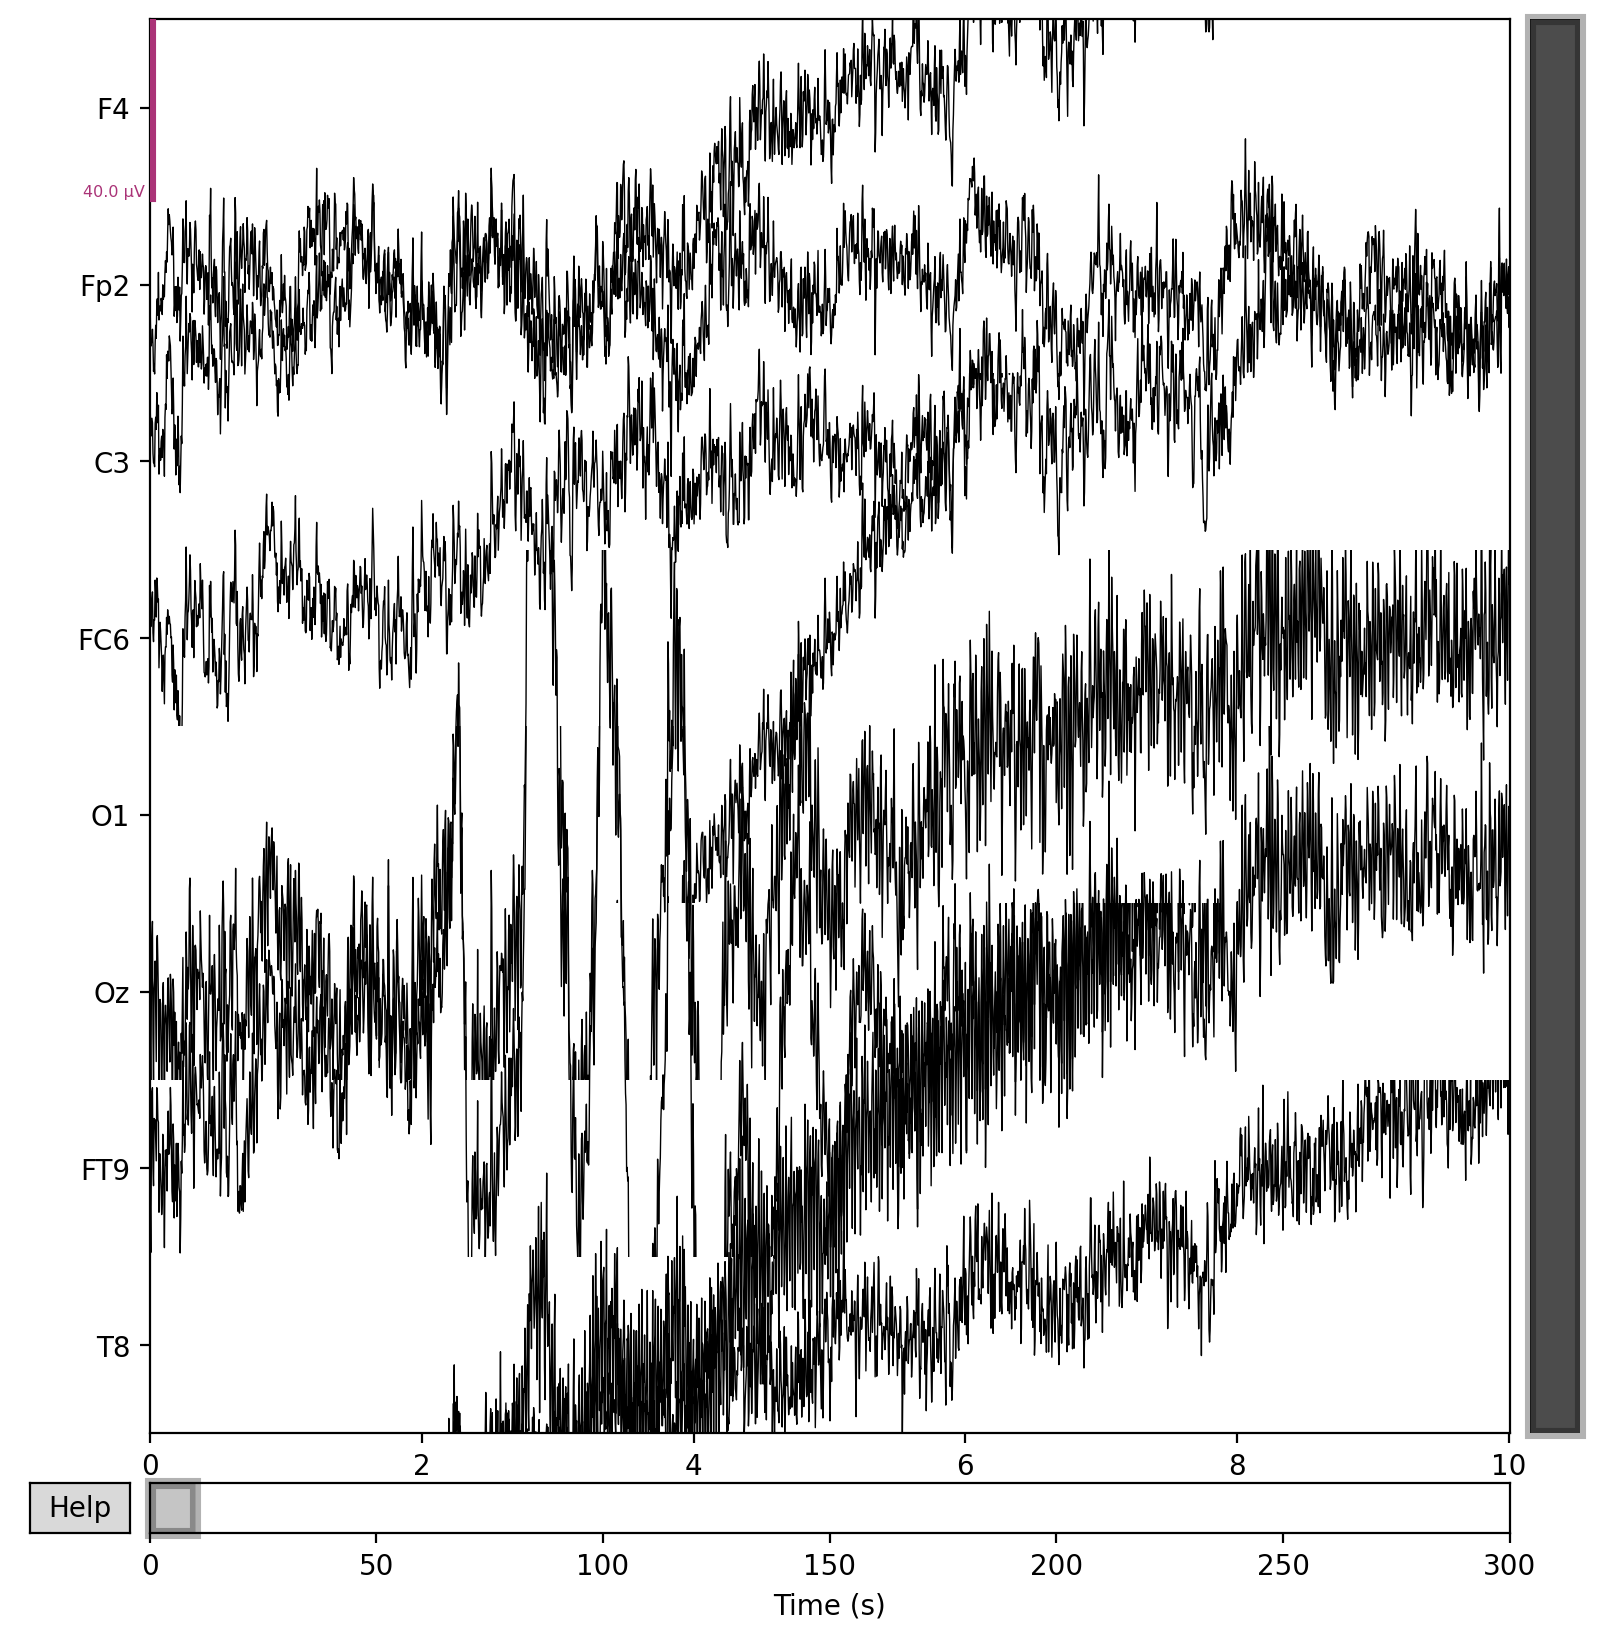

Channels marked as bad:
none


In [4]:
import mne
%matplotlib qt
ex = data['P001_S001_001']
ex.plot()

In [5]:
montage = mne.channels.make_standard_montage('standard_1020')
ex.set_montage(montage)

<RawArray | 8 x 75000 (300.0 s), ~4.6 MB, data loaded>

Using EOG channel: F4
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 107 significant peaks
Number of EOG events detected: 107
Not setting metadata
107 matching events found
No baseline correction applied
Using data from preloaded Raw for 107 events and 251 original time points ...
2 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for th

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


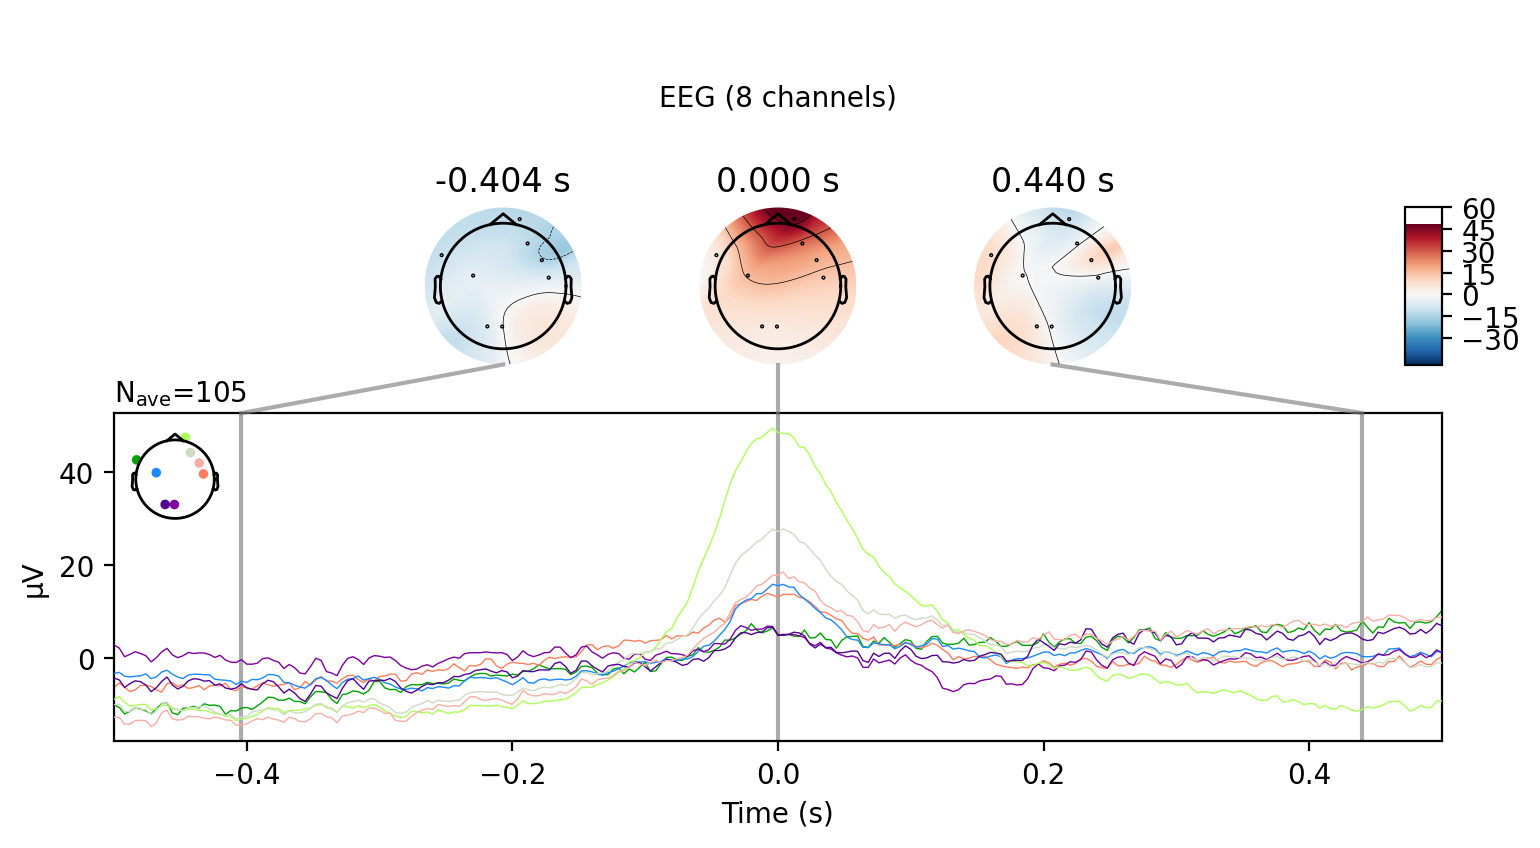

In [8]:
eog_evoked = create_eog_epochs(ex, ch_name='F4').average(picks='all')
eog_evoked.apply_baseline((None, None))
eog_evoked.plot_joint()

In [10]:
eog_projs, _ = compute_proj_eog(ex, n_grad=1, n_mag=1, n_eeg=1, reject=None,
                                no_proj=True, ch_name='F4')

Running EOG SSP computation
Using EOG channel: F4
EOG channel index for this subject is: [0]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 107 significant peaks
Number of EOG events detected: 107
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal band

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


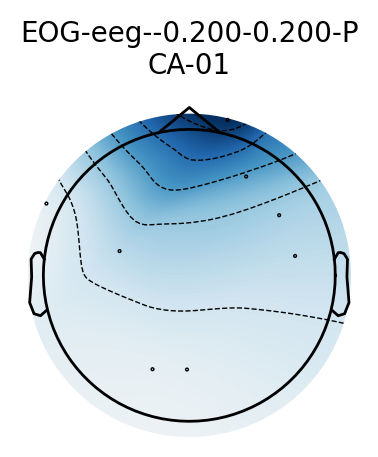

In [11]:
mne.viz.plot_projs_topomap(eog_projs, info=ex.info)

In [13]:
fig = mne.viz.plot_projs_joint(eog_projs, eog_evoked, 'all')
fig.suptitle('EOG projectors')

1 projection items deactivated


Text(0.5, 0.98, 'EOG projectors')

In [15]:
for title in ('Without', 'With'):
    if title == 'With':
        ex.add_proj(eog_projs)
    with mne.viz.use_browser_backend('matplotlib'):
        fig = ex.plot()
    fig.subplots_adjust(top=0.9)  # make room for title
    fig.suptitle('{} EOG projectors'.format(title), size='xx-large',
                 weight='bold')

1 projection items deactivated


Channels marked as bad:
none
Channels marked as bad:
none


Denne funker for labels:

 labels = {}
    for i in range(n_subjects):
        for j in range(n_sessions*n_runs):
            invalid_flag = False
            scores = scores_df.iloc[i, j+1] #need j+1 because it took in subject number as first value
            if scores == 0: 
                invalid_flag = True
            elif scores < cutoff:
                label = 0
            else:
                label = 1

            if not invalid_flag:
                subject = i + 1
                session = j//n_runs + 1 
                run = j % n_runs + 1
                key = f'P{str(subject).zfill(3)}_S{str(session).zfill(3)}_{str(run).zfill(3)}'
                labels[key] = label
            else:
                print('Invalid')
    return labels

Testing:
num_runs = 2
num_sessions = 2
a = (num_runs*num_sessions)

for j in range(num_runs*num_sessions):
    session = j // num_runs + 1
    run = j % num_runs + 1
    print('Ses: ', session, ' Run: ', run)